<h1> Assignment 1</h1>
<ul>
<p>General Info:</p>
<ul>
    <li>**Hand-In Date**: 31st January 2019</li>
    <li>**Hand-In Format**: as jupyter notebook (run once through) AND printed as PDF via e-class. The naming format shold be your studentId_Assignment1.filetype (pdf or ipynb).</li>
    <li>**Late Hand-In Penalty**: -10% of your points per late-day</li>  
    </ul>
<h2>Topics Covered: </h2>
<ul>
This lab covers the topics presented in the first three lecture groups, Introduction, Mathematical foundations and Classical optimization methods.<br />
To sucessfully complete the lab, the student should understand the mechanisms at work behind most classical solvers, have a decent understanding of problem spaces and start to get in touch with the Python 3.X framework and Jupyter Notebook. <br />
    This lab does require some minor programming proficiency in python and some basic lin.alg understanding. You should understand python functions, be able to work with numpy or scipy and for the bonus points matplotlib or any other plotting libary. You should understand how to approximate derivatives, what a hessian matrix is and what problems matrix inversion can raise. <br />

This lab specifically covers, over 4 toy-problems (Taks0), in increasing difficulty: <br /> 
<ul>
    <li> Random Search (Task1)
    <li> Gradient Descend/First Order Methods (Task2)
    <li> Newtonian/Second Order Methods (Task3) 
</ul>

<h3> Disclaimer! </h3>
Do not expect all methods to do extremely well on all toy-problems! The purpose of this assignment is also to motivate the topics covered in this course. Not all methods will be able to find all minima!!!

<h2>Marking Table: </h2>
<ul>
    There is a total of 99 points in this assignment. <br/>
    It is split in 3, equally weighted sections (Task 1-3). <br />
    Each of those sections contains: <br /><ul>
        <li> **Q1, 11 points** for explaining how the respective method works, concisely analyzing what potential issues can arise when choosing to use this technique, and what advantages this technique can offer. To come about those points, please carefully consider how the technique would perform on the toy-problems in Task 0. <br />
        <li> **Q2, 11 points** for implementing the method in code. Points are awarded for code functionality AND readability. The code should be understandable either on it's own (good) or in conjunction with the methodology explanation from Q1 (adequate). <br/>
        <li> **Q3, 11 points** for testing the method on the toy-problems from Task 0, and comparing to what was expected and commenting on any findings. <br/>
        <li> **Additional 7 points** for plotting convergence curves for each problem. This should encourage you to use those convergence curves of for example the algorithm step size or the function values for debugging while programming Q2 and 3. As long as the curves are plotted and issues pointed out, we can award points. HOWEVER THIS IS NOT NEEDED TO REACH FULL MARKS! <br/>
</ul>

In summary you can reach 33 points without programming. <br/>
Expect Task 1 to be easier than Task 2, which is again easier than Task 3. Plan yout time accordingly!
    
<h2>Python Help: </h2>
<ul>
This lab requires matplotlib and numpy, as well as obviously a working jupyter notebook and Python 3.X base. To install both modules, use the pip (or pi3) command within the console as follows:<br />
    <ul>
    for matplotlib: pip install -U matplotlib <br />
    for numpy: pip install -U numpy
    </ul>
    A generally helpful site for ALL programming questions is stackoverflow. Any questions not specifically answered here are likely too specific (OR your TA did not think of them) and should probably be looked up there first.<br/>
    Afterwards, if the question still persists: <br/>
    Either email your TA and wait for an answer (it can take long time since the TA will be basically redoing the same steps you, hopefully, did). **OR BETTER** get proactive and if you really do not manage to find anything after proper reflection and search then feel free to explain where you looked, what your problem is and your TA might be able to answer faster due to understanding your problem better and not having to retrace your search path as well :-)
    


<h2> Task 0, Preparation </h2>
<ul>
    <li> Run the following first cell to define the four toy problems you will be dealing with.
    <li> Then run the following second cell to plot the surfaces of all 4 functions. 
    <li> Take a second to consider those functions and what the problematic properties of those are. 
    <li> This will be important in the subsequent tasks!
</ul>
Each function takes two inputs, x and y. For convenience, x and y have to be either **BOTH** one dimensional vectors and the output will be a corresponding grid, or points and the output will be a single point. So x=[1,2,3], y=[1,2,3] will work, as well as x=1, y=1, but **not** x=[1,2,3] and y=1. 


In [87]:
import numpy as np # importing numpy as symbolic np in order to use those functions

def toy_problem_0(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)
    y = np.array(y)
    # if only one value is provided (pointwise)
    if x.shape == () and y.shape == ():
        z = x**2 + y**2
        return z
    # else we are dealing with an array of values, as for example plotting or maybe a population
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = x[_x]**2 + y[_y]**2
        return z

def toy_problem_1(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)
    y = np.array(y)
    # if only one value is provided
    if x.shape == () and y.shape == ():
        z = np.sqrt(x**2 + y**2)
        return z
    # else we are dealing with an array of values, so let's do that
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2)
        return z

def toy_problem_2(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():
        case1 = np.sqrt(x**2 + y**2)-np.pi/(w1*w2)
        case2 =(np.sqrt(x**2 + y**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x**2 + y**2))
        if case1 >= 0:
            z = case1
        else:
            z = case2
        return z
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                case1 = np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2)
                case2 =(np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x[_x]**2 + y[_y]**2))
                if case1 >= 0:
                    z[_x, _y] = case1
                else:
                    z[_x, _y] = case2
        return z

def toy_problem_3(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():
        z = np.sqrt(x**2 + y**2) - 1/(w1*w2)*np.cos(w1*x)*np.cos(w2*y)
        return z
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2) - 1/(w1*w2)*np.cos(w1*x[_x])*np.cos(w2*y[_y])
    return z

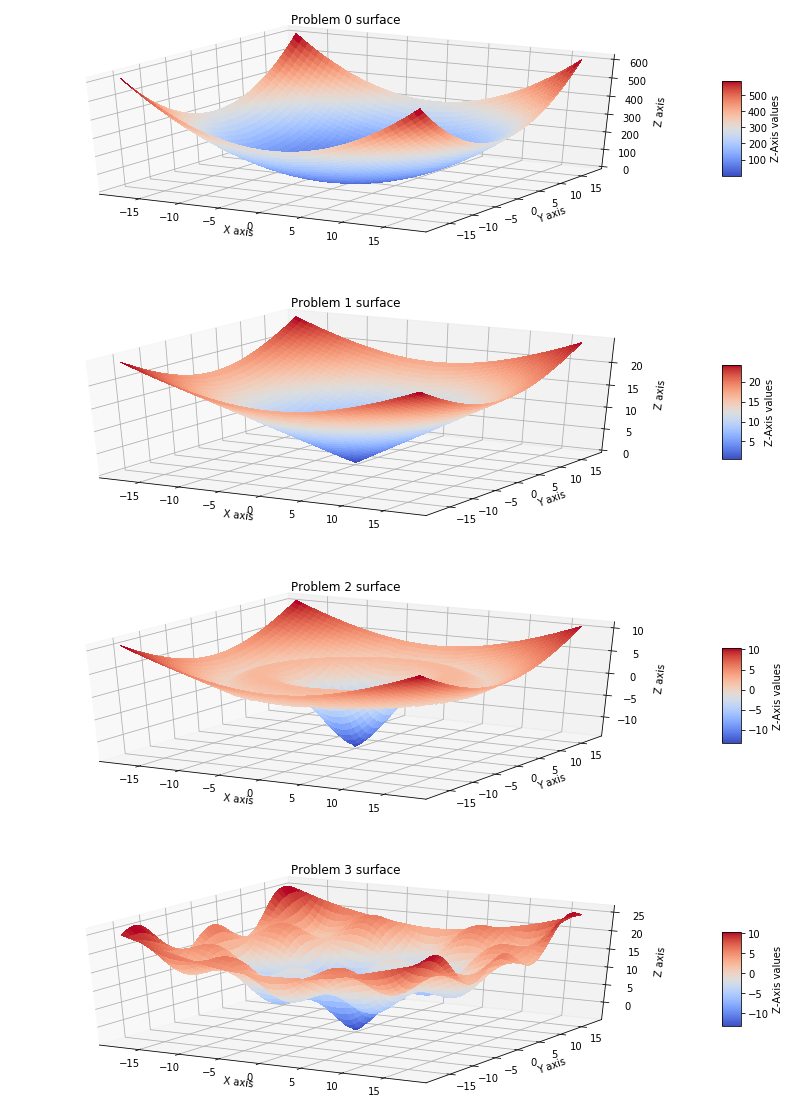

In [88]:
# Plot some nice plots for everyone to see
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# how many steps and at what resolution do I want to plot
steps = 350
x = 0.1*np.arange(-steps/2, steps/2)

y = 0.1*np.arange(-steps/2, steps/2)
X, Y = np.meshgrid(x, y)


# first subplot of four
fig = plt.figure()
ax = fig.gca(projection='3d')
surf1 = ax1.plot_surface(X, Y, toy_problem_0(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('Problem 0 surface')
fig.colorbar(surf1, shrink=0.4, aspect=5, label='Z-Axis values')

# second subplot of four
ax2 = fig.add_subplot(412, projection='3d')
surf2 = ax2.plot_surface(X, Y, toy_problem_1(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf2,  shrink=0.4, aspect=5, label='Z-Axis values')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('Problem 1 surface')

# third subplot of four
ax3 = fig.add_subplot(413, projection='3d')
surf3 = ax3.plot_surface(X, Y, toy_problem_2(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('Problem 2 surface')

# fourth subplot of four
ax4 = fig.add_subplot(414, projection='3d')
surf4 = ax4.plot_surface(X, Y, toy_problem_3(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax4.set_xlabel('X axis')
ax4.set_ylabel('Y axis')
ax4.set_zlabel('Z axis')
ax4.set_title('Problem 3 surface')

# and show plots
plt.show()

<h2> Task 1, Random Search: </h2>
<ul>
    *In Task 1, you are to implement a random search method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(15,15).*  <br/>
    Task 1 holds 33 (+7) points overall. <br/>
    
<li> **T1Q1, 11 Points**: Explain in words, concisely. <br/>
How does a random search work? <br/>
How would you go about implementing a random search in code? <br/>
In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using random search?) <br/> </li>
         
<li>**T1Q2, 11 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T1Q3, 11 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected? Can you come up with explanations for that behavior?</li>
<li>**BONUS, up to 7 Points**: Plot convergence curves, for for example the function value or the step-size and discuss based on those </li>
</ul>

<h3> TIPs: </h3>
<ul>
    <li> Python itself and numpy do have a plethorra of random number generators, google and chose one that fits your requirements best.
     </ul> 



*Placeholder for your written answer to T1Q1*


<h3>1. How does a random search work ? </h3>
Answer: Given a initial point in the search space, sampling neighbour data points and move to a data point at which objective value is better the current, and then iteratively move to better positions until meeting the terminal citeria. 

<h3>2.How would you go about implementing a random search in code? </h3>

Answer: frist initalize a data point randomly in the search place. and set a iterative budget /or a eplison value( if the difference between the current function value and function value at better position is smaller than a value, stop the algorithm.)

<h3>3.what issues and what benefits do you expect when using random search? </h3>

<p> <h4>Benifits:</h4> 1.easy to implement the algorithm 2. The algorithm does not require the object function to be convex because it is derivative-free, so it can be fitted to any type of functions 3.can find global optimal  </p> 
<p> <h4>Issues:</h4> 1. not scalable to larget dataset. 2. Not so accurate particularly when the computational buget is small 3. Time comlexity is high because many sampled data points are redundant </p>



In [89]:
z_track = [];

In [90]:
# placeholder to your answer to T1Q2
def random_search(x,y,x_init,y_init,buget,toy_number):
    '''
    
    '''
    x = np.array(x)
    y = np.array(y)
    len_x = x.shape[0]
    len_y = y.shape[0]
    iteration = buget
    
    z_init =model_eval(x_init,y_init,toy_number)
    z_track.append(z_init)# store the value in an array
    x_cur , y_cur ,z_cur = x_init, y_init,z_init
    while(iteration!= 0):
        x_idx = np.random.randint(0,len_x-1)
        y_idx = np.random.randint(0,len_y-1)
        x_next= x[x_idx]
        y_next= y[y_idx]
        z_next = model_eval(x_next,y_next,toy_number)
        if(z_next < z_cur):
            x_cur,y_cur,z_cur =x_next,y_next,z_next
            z_track.append(z_next)# store the value in an array
        iteration -= 1
        
    return z_cur, (x_cur,y_cur)

In [91]:
 def model_eval(x,y,toy_number):
    if(toy_number == 0):
         z = toy_problem_0(x, y)
    elif(toy_number == 1):
         z = toy_problem_1(x, y)
    elif(toy_number == 2): 
         z = toy_problem_2(x, y)
    elif(toy_number == 3): 
         z = toy_problem_3(x, y)
    return z;      

TOY Example zero result :
('The optimal value is:', 1.8000000000000005)
('The corresponding location is:', (1.2000000000000002, 0.60000000000000009))


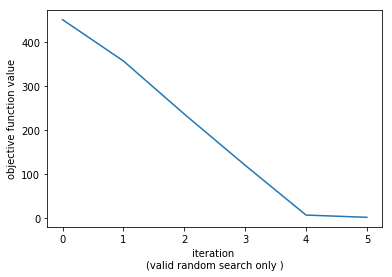

In [92]:
step =350
z_track = [];
z_opt, poition = random_search(x = 0.1*np.arange(-steps/2, steps/2),y = 0.1*np.arange(-steps/2, steps/2),x_init=15,y_init =15,buget =500,toy_number= 0)
print("TOY Example zero result :")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration \n(valid random search only )')
plt.ylabel('objective function value', multialignment='center')
plt.show()

TOY Example one result(By random search):
('The optimal value is:', 0.14142135623730953)
('The corresponding location is:', (0.10000000000000001, -0.10000000000000001))


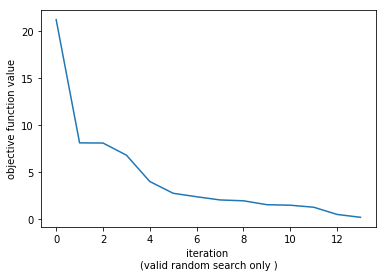

In [93]:
z_track = [];
z_opt, poition  = random_search(x = 0.1*np.arange(-steps/2, steps/2),y = 0.1*np.arange(-steps/2, steps/2),x_init=15,y_init =15,buget =10000,toy_number= 1)
print("TOY Example one result(By random search):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration \n(valid random search only )')
plt.ylabel('objective function value', multialignment='center')
plt.show()

TOY Example two result :
('The optimal value is:', -13.814216261159359)
('The corresponding location is:', (0.10000000000000001, -0.10000000000000001))


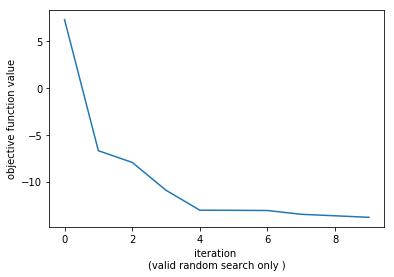

In [94]:
z_track = [];
z_opt, poition =random_search(x = 0.1*np.arange(-steps/2, steps/2),y = 0.1*np.arange(-steps/2, steps/2),x_init=15,y_init =15,buget =10000,toy_number= 2)
print("TOY Example two result :")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration \n(valid random search only )')
plt.ylabel('objective function value', multialignment='center')
plt.show()

TOY Example three result :
('The optimal value is:', -4.2264565911644194)
('The corresponding location is:', (0.20000000000000001, 0.0))


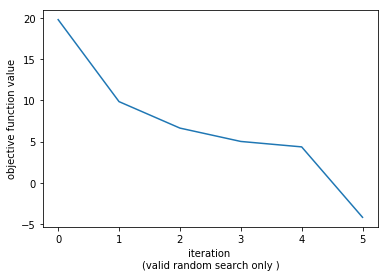

In [95]:
z_track = [];
z_opt, poition  = random_search(x = 0.1*np.arange(-steps/2, steps/2),y = 0.1*np.arange(-steps/2, steps/2),x_init=15,y_init =15,buget =10000,toy_number= 3)

print("TOY Example three result :")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration \n(valid random search only )')
plt.ylabel('objective function value', multialignment='center')
plt.show()

*Placeholder for additional comments for T1Q3*

<h5> comments </h5>
1. Many samplings are redundant, the itertaion time is 10000, but useful sampling is only 10 times or so.

2. Random sampling could get a good result as long as the number of sampling is sufficient. 


<h2> Task 2, Gradient Descend: </h2>
<ul>
    *In Task 2, you are to implement a gradient descend (or steepest descend) method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(15,15). * <br/>
    Task 2 holds 33 (+7) points overall. <br/>
    
<li>**T2Q1, 11 Points**: Explain in words, concisely. <br/>
How does a gradient based / first-order search work? <br/>
How would you go about implementing gradient descend (or steepest descend) search in code? <br/>
In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using gradient decent?) <br/> </li>

<li>**T2Q2, 11 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T2Q3, 11 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected? Can you come up with explanations for that behavior?</li>
<li>**BONUS, up to 7 Points**: Plot convergence curves, for for example the function value or the step-size and discuss based on those </li>
</ul>

<h3> TIPs: </h3>
<ul>
    <li> The classic approximate differentiation formula, df_dx = (f(x+h) - f(x-h)/(2*h) <br/>
    <li> This method can be sensitive to the scale of h, so play around. <br/>
     </ul> 


*Placeholder for your written answer to T2Q1*
<h3> How does a gradient based / first-order search work? </h3>
<p>1.By using the gradient information at a particular point , you are going to move toward with the steepest direct. In fact, the gradient information gives you the information which direction you are going to next. </p>
<h3> How would you go about implementing gradient descend (or steepest descend) search in code? <h3> 
<ul>
    <li>inital the algorihtm budget or giving another terminal citeria such as epsilon </li>
    <li>while the terminal citeria has not met<li>
    <li>1.compute the first order gradient  </li>
    <li>2.minus the gradient multiply the step_size and get the new data point <li>
    <li>until we run out of budget or meet the criteria </li>
</ul>

<h3> what issues and what benefits do you expect when using gradient decent? </h3>

<p> benefits:1. if the objective function is strongly convex function , this algorithm could find the global optimal. </p>
<p> issues:     1.computing gradient is time-comsuming ,in particular, when the function is complex 2. if the objective function is non-convex, we may find the local optimal.  3. the step_size should be desinged automatically </p>
            

In [96]:
# placeholder to your answer to T2Q2
def compute_derivative(x,y,delta,toy_number):
    derivative_x = (model_eval(x + delta,y,toy_number) - model_eval(x-delta ,y,toy_number)) / (2.0*delta) ; 
    derivative_y = (model_eval(x,y+ delta,toy_number) - model_eval(x,y-delta,toy_number)) / (2.0*delta); 
    return (derivative_x,derivative_y)

In [97]:
def gradient_decent(x,y,x_init,y_init,delta,buget,eplison,step_size,toy_number):
    '''
    input args: 
    '''
    x_min,x_max = min(x),max(x);
    y_min,y_max = min(y),max(y);
    x = np.array(x)
    y = np.array(y)
    len_x = x.shape[0]
    len_y = y.shape[0]
    iteration = buget 
    z_init = model_eval(x_init,y_init,toy_number)
    z_track.append(z_init)# store the value in an array
    x_cur , y_cur ,z_cur = x_init, y_init,z_init
    while(iteration!= 0):
        if(iteration != buget):
            x_cur , y_cur ,z_cur = x_next, y_next,z_next;
        deriv_x, deriv_y = compute_derivative(x_cur,y_cur,delta,toy_number)
        x_next = x_cur - step_size * deriv_x;
        y_next = y_cur - step_size * deriv_y;
        z_next = model_eval(x_next,y_next,toy_number)
        
        if(x_next >x_max or x_next < x_min or y_next > y_max or y_next < y_min):
            print("Error: out of the search space")
            break; 
        iteration -= 1;
        
        if (abs(z_next - z_cur) < eplison):
            print("Early Stoping at iteration: " + str(buget-iteration))
            break;    
        
        if(iteration % 1000 == 0):
            step_size = step_size / (buget-iteration);
        z_track.append(z_cur)# store the value in an array
        
    return z_cur, (x_cur,y_cur)

In [98]:
steps =350
x = 0.1*np.arange(-steps/2, steps/2) 
y = 0.1*np.arange(-steps/2, steps/2)

Early Stoping at iteration: 4001
TOY Example one result(By gradient decent):
('The optimal value is:', 8.1926841029017048)
('The corresponding location is:', (2.0239422055609326, 2.0239422055609326))


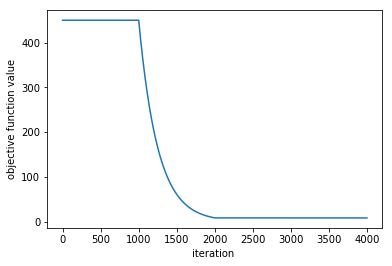

In [99]:
z_track =[];
z_opt, poition = gradient_decent(x,y,x_init = 15 ,y_init= 15 ,delta= 1e-5,eplison = 1e-10, buget = 500000,step_size = 1.0,toy_number = 0 )
print("TOY Example one result(By gradient decent):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

Early Stoping at iteration: 2001
TOY Example two result(By gradient decent):
('The optimal value is:', 9.4776903036520282e-06)
('The corresponding location is:', (-6.7017390836983382e-06, -6.7017390836983382e-06))


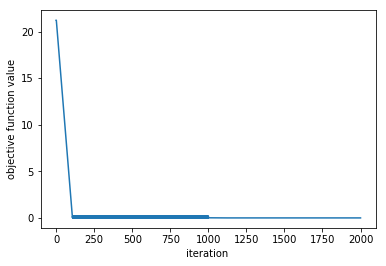

In [100]:
z_track =[];
z_opt, poition = gradient_decent(x,y,x_init = 15 ,y_init= 15 ,delta= 1e-10,eplison = 1e-5, buget = 900000,step_size = 0.2,toy_number = 1 )
print("TOY Example two result(By gradient decent):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

Early Stoping at iteration: 4001
TOY Example three result(By gradient decent):
('The optimal value is:', 0.00045674988093791024)
('The corresponding location is:', (9.8727502249676569, 9.8727502249676569))


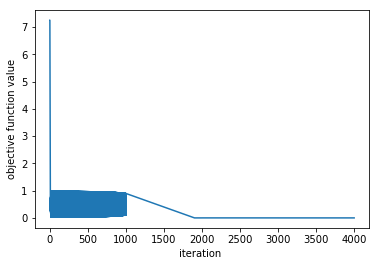

In [101]:
z_track =[];
z_opt, poition = gradient_decent(x,y,x_init = 15 ,y_init= 15 ,delta= 1e-10,eplison = 1e-10, buget = 900000,step_size = 1.0,toy_number = 2)
print("TOY Example three result(By gradient decent):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

Early Stoping at iteration: 6
TOY Example four result(By gradient decent):
('The optimal value is:', 13.810104585864547)
('The corresponding location is:', (13.07092976311651, 11.896864473683308))


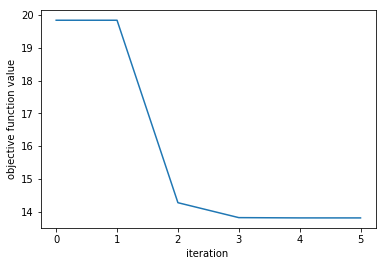

In [102]:
z_track =[];
z_opt, poition = gradient_decent(x,y,x_init = 15 ,y_init= 15 ,delta= 1e-10,eplison = 1e-5,buget = 900000,step_size = 1.0,toy_number = 3)
print("TOY Example four result(By gradient decent):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

In [103]:
# placeholder for your answer to T2Q3
#gradient disappear! 

*placeholder to your written comments for T3Q3*
<h5> comments </h5> 
1. In these settings, the steepest gradient decent algorithm failed to get the optimal solution, I guess my step size is not well designed. 
2. Notice that, in the toy exmple two and three is even bad, this is because the gradient may disappear in the place where all the graident is equal to zero,but in the center of that subplace, the gradient is not zero . for our algorithm, it cannot reach out there. 
3. In toy example 4, we could only find the local optimal. 
4. From the convergence plot, we can see that there is oscillation on the fly, this is because the stepsize is not proper. 

### <h2> Task 3, Method 3 </h2>
<ul>
    *In Task 3, you are to implement Newton-Raphson method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(15,15). * <br/>
    Task 3 holds 33 (+7) points overall. <br/>
<li>**T3Q1, 11 Points**: Explain in words, concisely. <br/>
How does a second-order based search work? <br/>
How would you go about implementing Newton-Raphson search in code? <br/>
In context of the 4 toy-problems from Task0, what issues and what benefits do you see expect when Newton-Raphson method?) <br/> </li>
<li>**T3Q2, 11 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T3Q3, 11 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected? Can you come up with explanations for that behavior?</li>
<li>**BONUS, up to 7 Points**: Plot convergence curves, for for example the function value or the step-size and discuss based on those </li>
   </ul> 
<h3> TIPs: </h3>
<ul>
    <li> Reasonably good approximating of the Hessian can be obtained with smart re-use of the classic approximative differentiation formula, df_dx = (f(x+h) - f(x-h)/(2*h) <br/>
    <li> For Newton method, an inverse of Hessian is needed. It is recommended to use numpy.linalg.pinv OVER numpy.linalg.inv, due to stability reasons. <br/>
    <li> This method will be very sensitive to the scale of h, so play around. <br/>
    <li> The performance of this method may be surprisingly good or bad, depending on the problem. Make sure you know what to expect! <br/>
     </ul> 

*Placeholder for your written answer to T3Q1*
<h4> 1. How does a second-order based search work? </h4>
 For second-order based search work, it iteratively minimizes quadratic approximations to the objective function.So it not only cosidering the gradient information but also taking the speed of each direction into consideration. 

<h4> 2. How would you go about implementing Newton-Raphson search in code? </h4> 
<ul>
    <li>inital the algorihtm budget or giving another terminal citeria such as epsilon </li>
    <li>while the terminal citeria has not met<li>
    <li>1.compute the first order derivative  </li>
    <li>2.based on the first order derivative, compute the hessian matrix and its inverse matrix </li>
    <li>3.do the matrix multiplication to get the second-order derivatives, using the reuslt to get the new data point <li>
    <li>iteration until we run out of budget or meet the terminal criteria </li>
</ul>
<h4> 3. In context of the 4 toy-problems from Task0, what issues and what benefits do you see expect when Newton-Raphson method? </h4>
<p> Benefits : </p>
<div>1.Through second-order derivatives, it is much harder to get over-shooting (compared with steepest gradient decent) </div> 
<div>2.Typically many fewer iterations than gradient descent (The computational cost is much smaller than gradient decent)</div> 
<p> issues: </p>
<div>1.Hessian matrix does not exist or isn’t invertible </div> 
<div>2.The time complexity to take the inverse of the matrix is O(N^3),so, newton method is not suitable on large dataset. </div> 

In [223]:
# placeholder to your answer to T3Q2
def hessian_matrix(x,y,delta,toy_number):
    deri_x,deri_y = compute_derivative(x,y,delta,toy_number);
    
    deri_x_delta,_ = compute_derivative(x+ delta,y,delta,toy_number);
    deri_yx_delta,deri_y_delta =compute_derivative(x,y+delta,delta,toy_number);
    
    deri_xy_delta,_ = compute_derivative(x,y-delta,delta,toy_number);
    
    #Second-order forward 
    deri_xx = (deri_x_delta - deri_x) / delta; 
    deri_yy = (deri_y_delta - deri_y) / delta;
    #Second-order internal
    deri_xy = (deri_yx_delta -deri_xy_delta) / (2*delta);
    
    
    print("deri_xy",deri_xy)
    print("deri_xx",deri_xx)
    print("deri_yy",deri_yy)
    
    
    hessian = np.array([[deri_xx,deri_xy], [deri_xy,deri_yy]]);
    
    #assert(deri_xy == deri_yx ) #check if this implementation is correct 
    return hessian; 

In [224]:
def newton_raphson(x,y,x_init,y_init,delta,eplison,buget,toy_number):
    '''
    input args: 
    '''
    x_min,x_max = min(x),max(x);
    y_min,y_max = min(y),max(y);
    x = np.array(x)
    y = np.array(y)
    len_x = x.shape[0]
    len_y = y.shape[0]
    iteration = buget 
    z_init = model_eval(x_init,y_init,toy_number)
    z_track.append(z_init)# store the value in an array
    x_cur , y_cur ,z_cur = x_init, y_init,z_init
    
    while(iteration!= 0):
        if(iteration != buget):
            x_cur , y_cur ,z_cur = x_next, y_next,z_next;
        deriv_x, deriv_y = compute_derivative(x_cur,y_cur,delta,toy_number);
        x_vector = np.array([[x_cur,y_cur]]);
        deriv_vector =np.array([[deriv_x, deriv_y]]);
        hessian = hessian_matrix(x_cur,y_cur,delta,toy_number);
        hessian_inverse = np.linalg.pinv(hessian);
        x_vector = x_vector - np.matmul(hessian_inverse,deriv_vector.T)
        x_next,y_next= x_vector[0][0],x_vector[1][0];
        z_next = model_eval(x_next,y_next,toy_number)
        z_track.append(z_next)# store the value in an array
        if(x_next > x_max or x_next < x_min or y_next > y_max or y_next < y_min):
            print("Error: out of the search space")
            print("Last valid result : ")
            return z_cur,(x_cur,y_cur)
        iteration -= 1;
        
        if (abs(z_next - z_cur) < eplison):
            print("Early Stoping at iteration: " + str(buget-iteration))
            break;    
    return z_next, (x_next,y_next)

In [225]:
steps =350
x = 0.1*np.arange(-steps/2, steps/2) 
y = 0.1*np.arange(-steps/2, steps/2)

('deri_xy', 0.00014210854715202004)
('deri_xx', 2.00003569261753)
('deri_yy', 2.00003569261753)
('deri_xy', 0.0)
('deri_xx', 2.000000000000135)
('deri_yy', 1.9999999999980103)
('deri_xy', 0.0)
('deri_xx', 2.0)
('deri_yy', 2.0)
Early Stoping at iteration: 3
Toy Example 1st result(By newton_raphson):
('The optimal value is:', 4.5379241757261616e-30)
('The corresponding location is:', (-2.330581375744896e-22, -2.1302404032705104e-15))


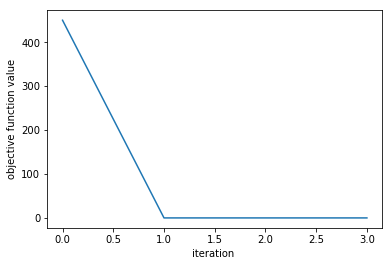

In [227]:
z_track = []
z_opt, poition = newton_raphson(x,y,x_init = 15 ,y_init= 15 ,delta= 1e-5,eplison = 1e-10,buget = 500,toy_number = 0 )
print("Toy Example 1st result(By newton_raphson):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

('deri_xy', -888.17841970012523)
('deri_xx', 0.0)
('deri_yy', 0.0)
('deri_xy', 0.0)
('deri_xx', 0.0)
('deri_yy', 0.0)
Early Stoping at iteration: 2
TOY Example 2nd result(By newton_raphson):
('The optimal value is:', 21.214329336268264)
('The corresponding location is:', (15.000796132, 15.000796132))


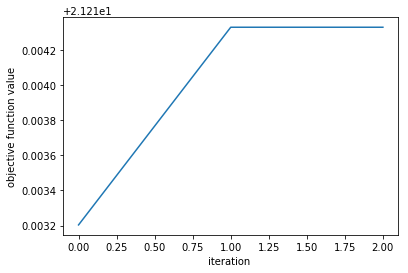

In [239]:
z_track = []
z_opt, poition = newton_raphson(x,y,x_init = 15,y_init= 15 ,delta= 1e-9,eplison = 1e-5,buget = 500,toy_number = 1 )
print("TOY Example 2nd result(By newton_raphson):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

('deri_xy', -0.023570225771152309)
('deri_xx', 0.023569047158389367)
('deri_yy', 0.023569047158389367)
Error: out of the search space
Last valid result : 
TOY Example 3rd result(By newton_raphson):
('The optimal value is:', 7.2505694196417902)
('The corresponding location is:', (15, 15))


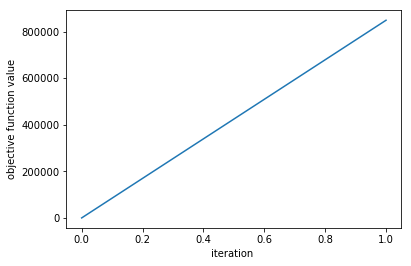

In [236]:
z_track = []
z_opt, poition = newton_raphson(x,y,x_init = 15 ,y_init= 15 ,delta= 1e-3,eplison = 1e-5,buget = 500,toy_number = 2 )
print("TOY Example 3rd result(By newton_raphson):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

('deri_xy', -0.44571152457706376)
('deri_xx', 0.30213022306213588)
('deri_yy', 0.36727804797465069)
Error: out of the search space
Last valid result : 
TOY Example 4th result(By newton_raphson):
('The optimal value is:', 19.837436599507569)
('The corresponding location is:', (15, 15))


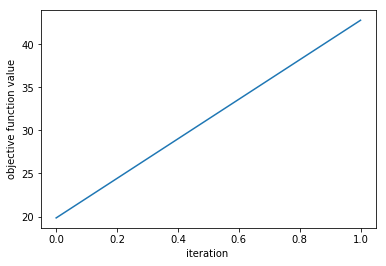

In [237]:
z_track = []
z_opt, poition = newton_raphson(x,y,x_init = 15 ,y_init= 15 ,delta= 1e-3,eplison = 1e-10,buget = 500000,toy_number = 3)
print("TOY Example 4th result(By newton_raphson):")
print ("The optimal value is:" , z_opt )
print ("The corresponding location is:", poition )
budget_array = [] 
for idx in range (len(z_track)):
    budget_array.append(idx)
plt.plot(budget_array, z_track)
plt.xlabel('iteration ')
plt.ylabel('objective function value', multialignment='center')
plt.show()

*Placeholder for your comments to T3Q3*
<h5> comments </h5> 
1. it converges very fast! and in all these four cases, it find the optimal solution. 
2. maybe I think we can get such a good result is just because we have a good inital point and these function is not complicated to compute the gradients. 